# Random Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
digits=load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

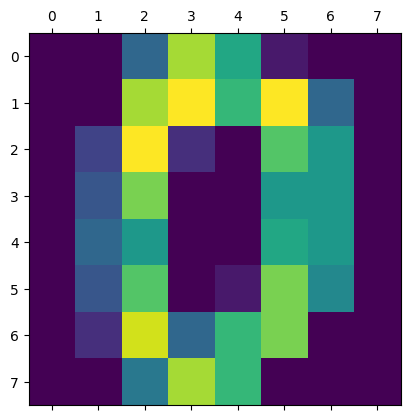

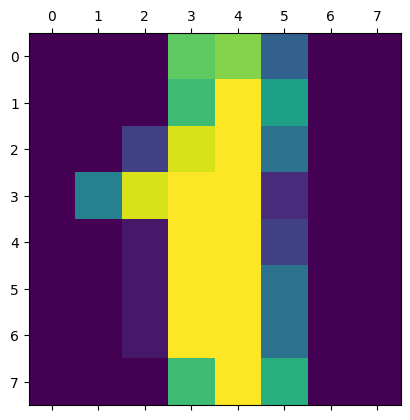

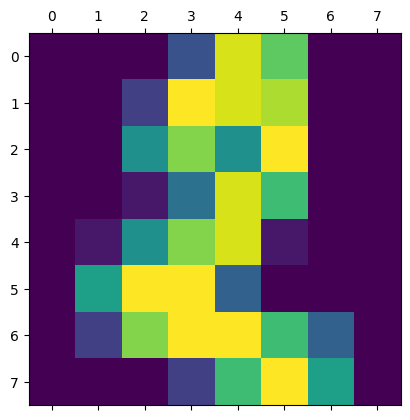

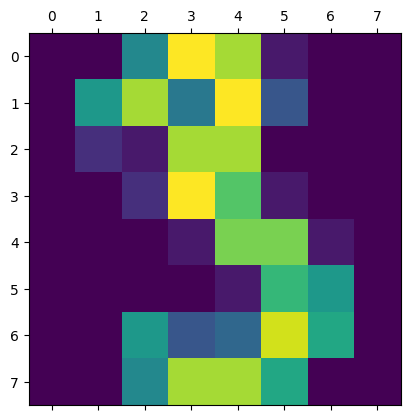

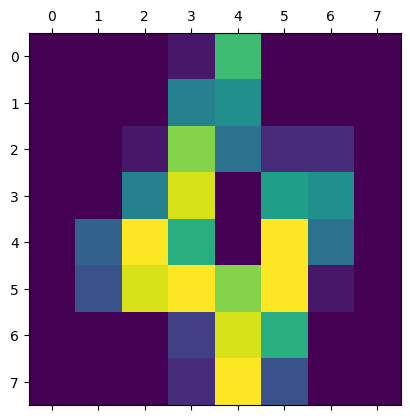

In [4]:
for i in range(5):
    plt.matshow(digits.images[i])

In [5]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [6]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [8]:
x=df

In [9]:
y=pd.DataFrame(digits.target)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50,criterion='gini')

In [12]:
model.fit(x_train,y_train)

C:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=50)

In [13]:
x_test[:5]

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1227,0.0,0.0,6.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,15.0,16.0,3.0,0.0,0.0
1576,0.0,8.0,13.0,15.0,16.0,16.0,8.0,0.0,0.0,9.0,...,0.0,0.0,0.0,9.0,16.0,6.0,0.0,0.0,0.0,0.0
202,0.0,0.0,4.0,15.0,11.0,1.0,0.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,4.0,13.0,14.0,6.0,0.0,0.0
1184,0.0,0.0,2.0,9.0,14.0,16.0,15.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,14.0,5.0,0.0,0.0,0.0
428,0.0,0.0,0.0,1.0,12.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,15.0,13.0,0.0,0.0


In [14]:
y_test[:5]

,0
1227,1
1576,5
202,0
1184,7
428,1


In [15]:
model.score(x_test,y_test)

0.9722222222222222

In [16]:
y_pred=model.predict(x_test)

In [17]:
y_pred[:5]

array([1, 5, 0, 7, 1])

In [18]:
model.score(x_test,y_pred)

1.0

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[57,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 62,  0,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1, 43,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  0, 54]], dtype=int64)

In [20]:
import seaborn as sns

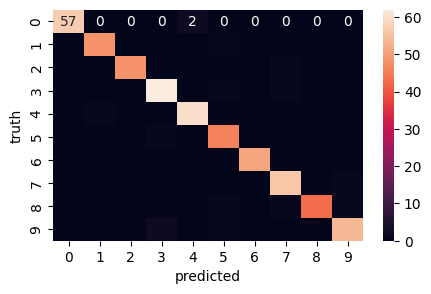

In [21]:
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()